## Importando bibliotecas

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

## Importando dataset

In [2]:
df = pd.read_csv("../dados/processados/ITENS_PROVA_2019_ATE_2022_AZUL.csv")

## Comecando eda

In [3]:
print("Primeiras linhas do dataframe:")
print(df.head())
print("\nInformações do dataframe:")
print(df.info())
print("\nEstatísticas descritivas:")
print(df.describe())

Primeiras linhas do dataframe:
   CO_POSICAO SG_AREA  CO_ITEM TX_GABARITO  CO_HABILIDADE  IN_ITEM_ABAN  \
0           1      LC    55166           B            7.0             0   
1           2      LC    54110           D            7.0             0   
2           3      LC    23564           A            6.0             0   
3           4      LC    31954           B            8.0             0   
4           5      LC   118180           E            5.0             0   

   TX_MOTIVO_ABAN  NU_PARAM_A  NU_PARAM_B  NU_PARAM_C TX_COR  CO_PROVA  \
0             NaN     2.66039     0.61130     0.19627   Azul       511   
1             NaN     2.82077     0.63692     0.16707   Azul       511   
2             NaN     4.08473     0.41261     0.20536   Azul       511   
3             NaN     2.02433     0.34872     0.20967   Azul       511   
4             NaN     5.61439     0.49582     0.14570   Azul       511   

   TP_LINGUA  IN_ITEM_ADAPTADO   ano  
0        0.0               0.0  20

Limpeza

In [14]:
df['CO_HABILIDADE'] = df['CO_HABILIDADE'].astype(int)

# Remover colunas não necessárias
colunas_drop = ["IN_ITEM_ABAN", "TX_MOTIVO_ABAN", "TX_COR", "IN_ITEM_ADAPTADO"]
df.drop(columns=colunas_drop, errors="ignore", inplace=True)
df.head()

,CO_POSICAO,SG_AREA,CO_ITEM,TX_GABARITO,CO_HABILIDADE,NU_PARAM_A,NU_PARAM_B,NU_PARAM_C,CO_PROVA,TP_LINGUA,ano
0,1,LC,55166,B,7,2.66039,0.61130,0.19627,511,0.0,2019
1,2,LC,54110,D,7,2.82077,0.63692,0.16707,511,0.0,2019
2,3,LC,23564,A,6,4.08473,0.41261,0.20536,511,0.0,2019
3,4,LC,31954,B,8,2.02433,0.34872,0.20967,511,0.0,2019
4,5,LC,118180,E,5,5.61439,0.49582,0.14570,511,0.0,2019


Número de questoes validas por ano

C:\Users\hudo\AppData\Local\Temp\ipykernel_25168\2230974311.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=questoes_por_ano, x='ano', y='quantidade', palette=cores)


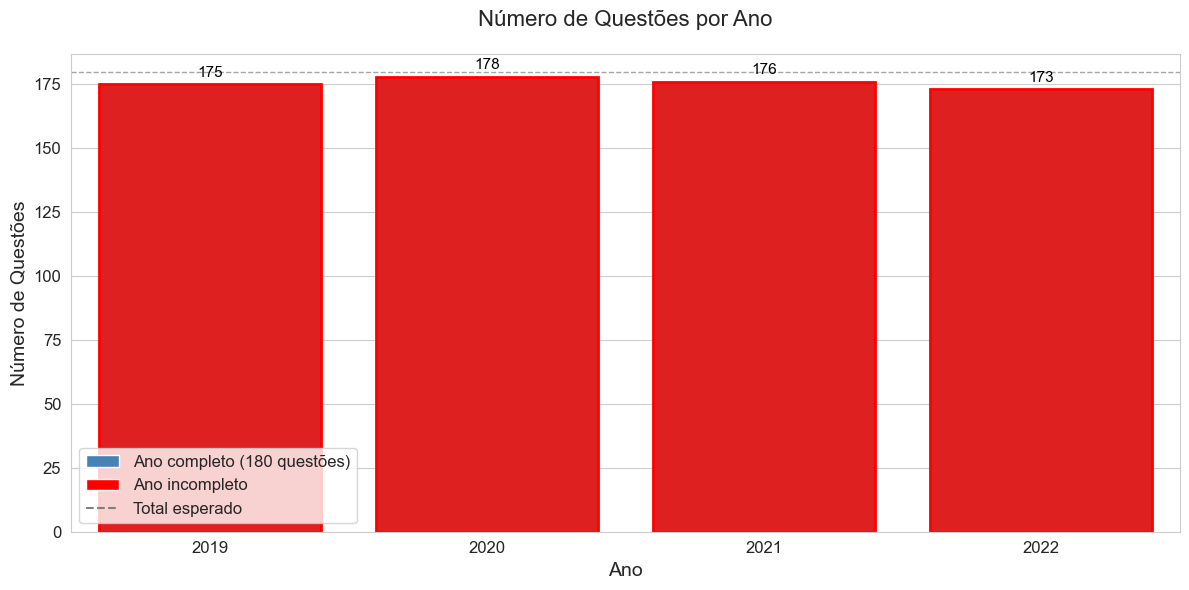

In [ ]:
# Configurações do gráfico
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.title('Número de Questões por Ano', fontsize=16, pad=20)

# Criar dataframe com contagem de questoes por ano
questoes_por_ano = df['ano'].value_counts().sort_index().reset_index()
questoes_por_ano.columns = ['ano', 'quantidade']

# Definir cores (vermelho para anos incompletos)
cores = ['red' if q < 180 else 'steelblue' for q in questoes_por_ano['quantidade']]

# Criar gráfico de barras
bar = sns.barplot(data=questoes_por_ano, x='ano', y='quantidade', palette=cores)

# Adicionar linha de referência (total esperado de 180 questoes)
plt.axhline(y=180, color='gray', linestyle='--', linewidth=1, alpha=0.7)

# Adicionar valores em cima de cada barra
for index, row in questoes_por_ano.iterrows():
    bar.text(index, row['quantidade']+3, f"{row['quantidade']}", 
             color='black', ha='center', fontsize=11)

# Destacar anos incompletos
anos_incompletos = questoes_por_ano[questoes_por_ano['quantidade'] < 180]
if not anos_incompletos.empty:
    for _, row in anos_incompletos.iterrows():
        bar.patches[row.name].set_edgecolor('red')
        bar.patches[row.name].set_linewidth(2)

# Adicionar informações extras
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Número de Questões', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adicionar legenda
handles = [Patch(facecolor='steelblue', label='Ano completo (180 questões)'),
           Patch(facecolor='red', label='Ano incompleto'),
           Line2D([0], [0], color='gray', linestyle='--', label='Total esperado')]
plt.legend(handles=handles, fontsize=12)

plt.tight_layout()
plt.show()

NU_PARAM_B medio geral

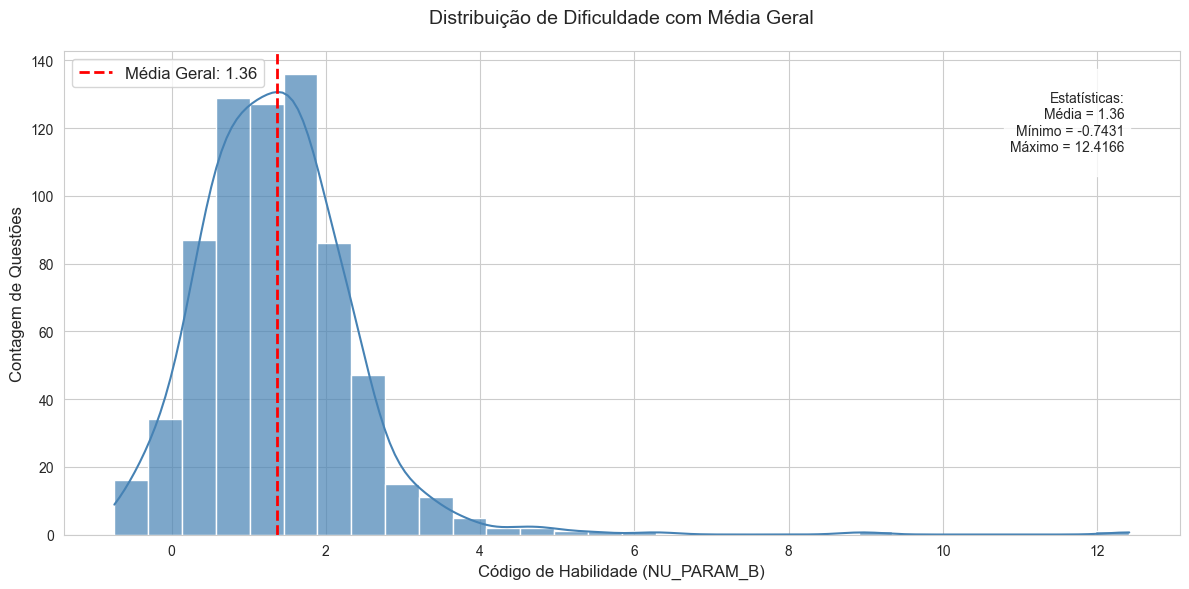

In [43]:
# Configurações de estilo
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
plt.title('Distribuição de Dificuldade com Média Geral', fontsize=14, pad=20)

# Criar o histograma
ax = sns.histplot(data=df, x='NU_PARAM_B', bins=30, kde=True, 
                 color='steelblue', alpha=0.7, edgecolor='white')

# Calcular e plotar a média geral
media_geral = df['NU_PARAM_B'].mean()
plt.axvline(x=media_geral, color='red', linestyle='--', linewidth=2, 
            label=f'Média Geral: {media_geral:.2f}')

# Adicionar informações extras
plt.xlabel('Código de Habilidade (NU_PARAM_B)', fontsize=12)
plt.ylabel('Contagem de Questões', fontsize=12)
plt.legend(fontsize=12)

# Mostrar estatísticas no gráfico
stats_text = f"""
Estatísticas:
Média = {media_geral:.2f}
Mínimo = {df['NU_PARAM_B'].min()}
Máximo = {df['NU_PARAM_B'].max()}
"""
plt.text(0.95, 0.95, stats_text, transform=ax.transAxes,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

C:\Users\hudo\AppData\Local\Temp\ipykernel_25168\1249597592.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box = sns.boxplot(data=df, x='SG_AREA', y='NU_PARAM_B',


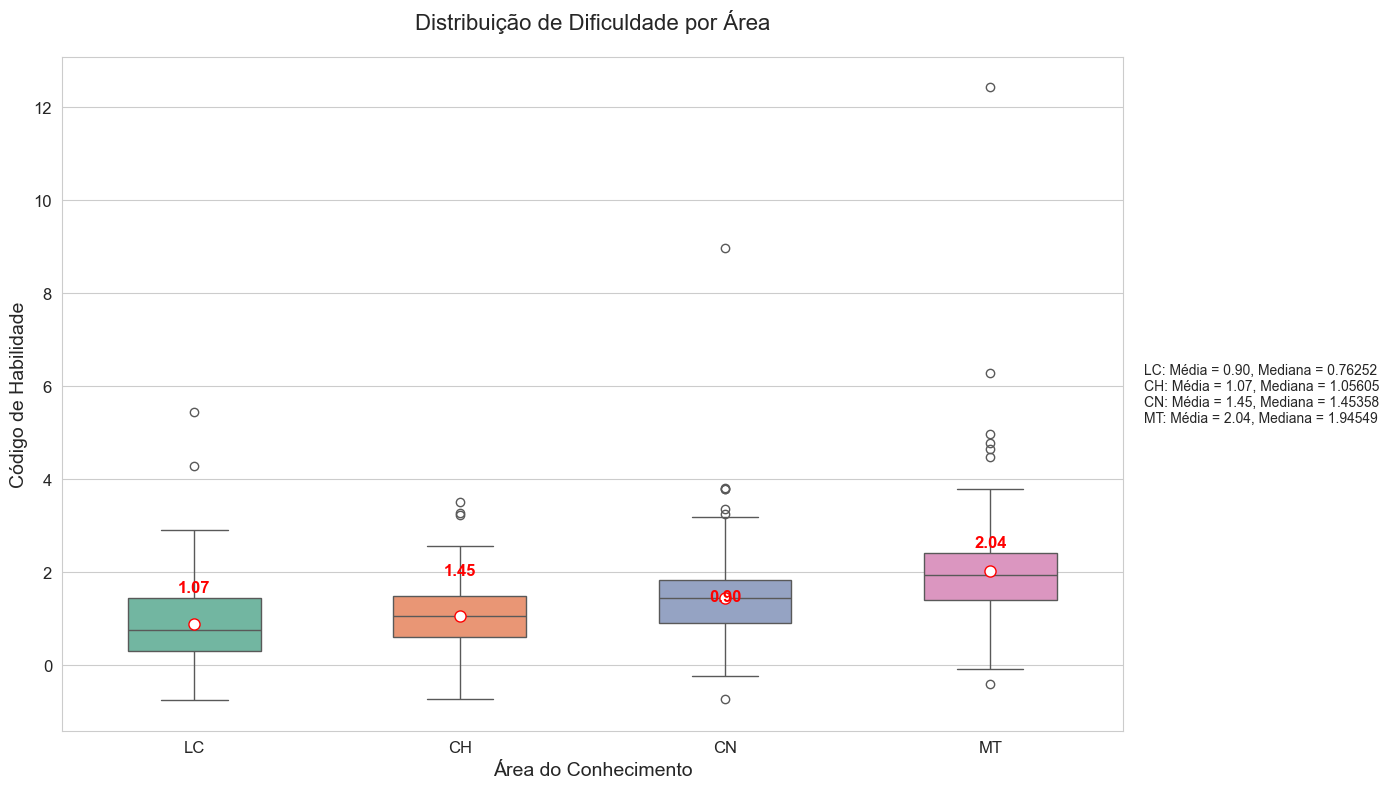

In [44]:
# Configurações do gráfico
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
plt.title('Distribuição de Dificuldade por Área', fontsize=16, pad=20)

# Criar boxplot com swarmplot sobreposto
box = sns.boxplot(data=df, x='SG_AREA', y='NU_PARAM_B', 
                 palette='Set2', width=0.5, showmeans=True,
                 meanprops={"marker":"o", "markerfacecolor":"white", 
                           "markeredgecolor":"red", "markersize":"8"})

# Calcular e adicionar médias por área
medias_por_area = df.groupby('SG_AREA')['NU_PARAM_B'].mean().reset_index()
for i, area in enumerate(medias_por_area['SG_AREA']):
    plt.text(i, medias_por_area.loc[i, 'NU_PARAM_B'] + 0.5, 
             f'{medias_por_area.loc[i, "NU_PARAM_B"]:.2f}',
             horizontalalignment='center', size=12, color='red', weight='semibold')

# Adicionar informações extras
plt.xlabel('Área do Conhecimento', fontsize=14)
plt.ylabel('Código de Habilidade', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adicionar estatísticas por área como anotação
stats_text = "\n".join([
    f"{area}: Média = {df[df['SG_AREA']==area]['NU_PARAM_B'].mean():.2f}, "
    f"Mediana = {df[df['SG_AREA']==area]['NU_PARAM_B'].median()}"
    for area in df['SG_AREA'].unique()
])

plt.text(1.02, 0.5, stats_text, transform=box.transAxes,
         verticalalignment='center', bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

C:\Users\hudo\AppData\Local\Temp\ipykernel_25168\783395722.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  box = sns.boxplot(data=df, x='ano', y='NU_PARAM_B',


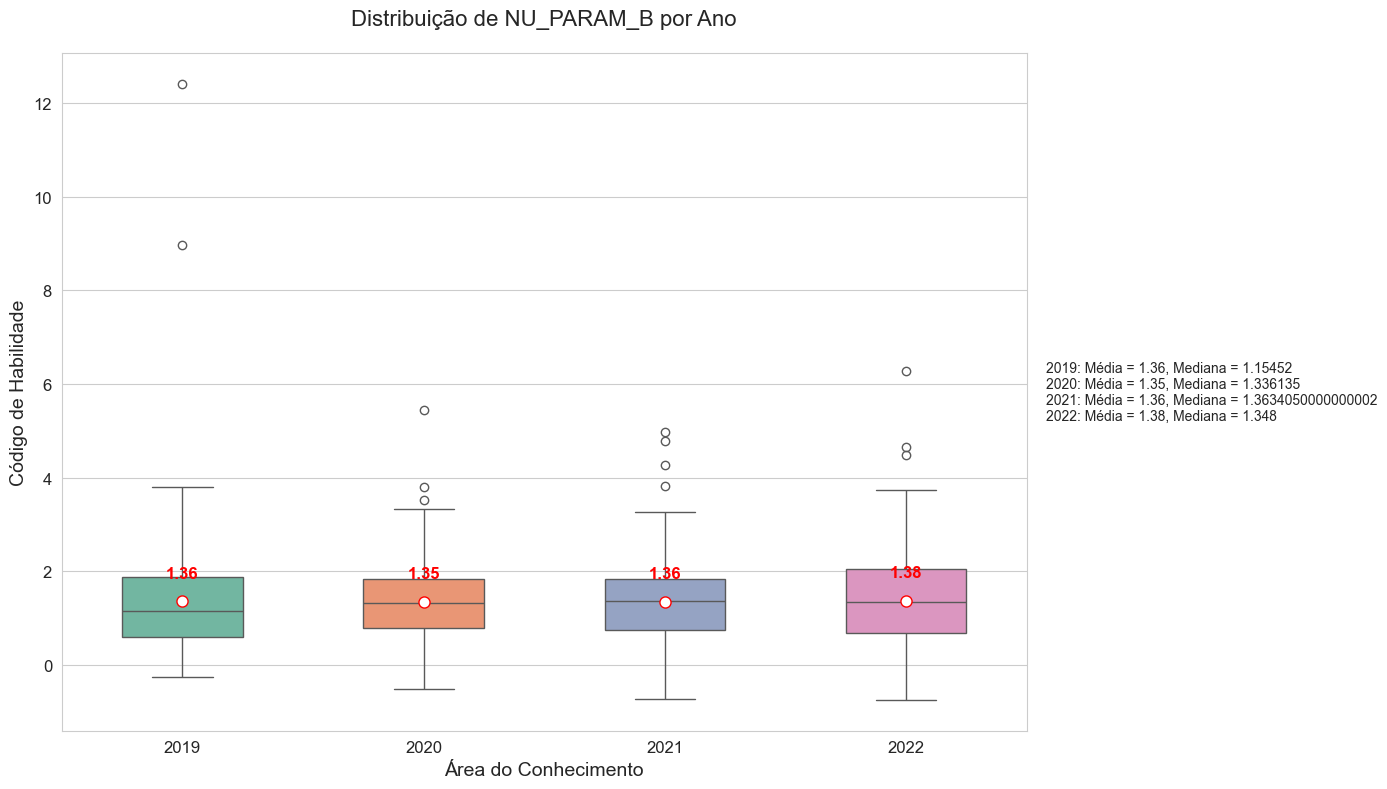

In [45]:
# Configurações do gráfico
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
plt.title('Distribuição de NU_PARAM_B por Ano', fontsize=16, pad=20)

# Criar boxplot com swarmplot sobreposto
box = sns.boxplot(data=df, x='ano', y='NU_PARAM_B', 
                 palette='Set2', width=0.5, showmeans=True,
                 meanprops={"marker":"o", "markerfacecolor":"white", 
                           "markeredgecolor":"red", "markersize":"8"})

# Adicionar pontos com swarmplot (opcional - comentado por padrão pois pode sobrecarregar com muitos dados)
# swarm = sns.swarmplot(data=df, x='SG_AREA', y='CO_HABILIDADE', 
#                      color='black', alpha=0.3, size=3)

# Calcular e adicionar médias por área
medias_por_area = df.groupby('ano')['NU_PARAM_B'].mean().reset_index()
for i, area in enumerate(medias_por_area['ano']):
    plt.text(i, medias_por_area.loc[i, 'NU_PARAM_B'] + 0.5, 
             f'{medias_por_area.loc[i, "NU_PARAM_B"]:.2f}',
             horizontalalignment='center', size=12, color='red', weight='semibold')

# Adicionar informações extras
plt.xlabel('Área do Conhecimento', fontsize=14)
plt.ylabel('Código de Habilidade', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adicionar estatísticas por área como anotação
stats_text = "\n".join([
    f"{area}: Média = {df[df['ano']==area]['NU_PARAM_B'].mean():.2f}, "
    f"Mediana = {df[df['ano']==area]['NU_PARAM_B'].median()}"
    for area in df['ano'].unique()
])

plt.text(1.02, 0.5, stats_text, transform=box.transAxes,
         verticalalignment='center', bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

C:\Users\hudo\AppData\Local\Temp\ipykernel_25168\4051837212.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_habilidades = habilidades_por_area.groupby('SG_AREA').apply(
c:\Users\hudo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
c:\Users\hudo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `

<Figure size 1400x800 with 0 Axes>

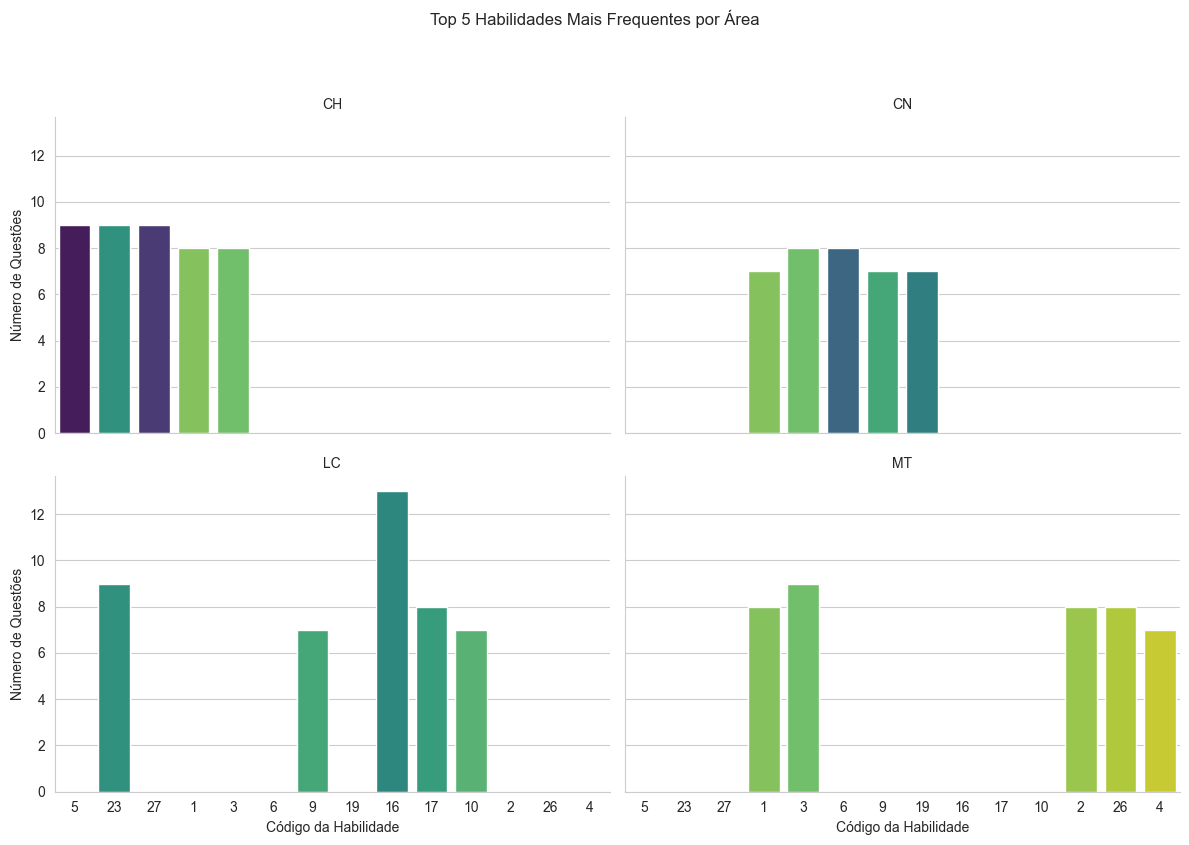

In [46]:
# 1. Contagem de habilidades por área
habilidades_por_area = df.groupby(['SG_AREA', 'CO_HABILIDADE']).size().reset_index(name='count')

# 2. Top 5 habilidades mais frequentes por área
top_habilidades = habilidades_por_area.groupby('SG_AREA').apply(
    lambda x: x.nlargest(5, 'count')).reset_index(drop=True)

# 3. Visualização em gráfico de barras
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

# Gráfico separado por área
g = sns.FacetGrid(top_habilidades, col='SG_AREA', col_wrap=2, height=4, aspect=1.5)
g.map(sns.barplot, 'CO_HABILIDADE', 'count', order=top_habilidades['CO_HABILIDADE'], palette='viridis')
g.set_titles("{col_name}")
g.set_axis_labels("Código da Habilidade", "Número de Questões")

plt.suptitle('Top 5 Habilidades Mais Frequentes por Área', y=1.05)
plt.tight_layout()
plt.show()

<Figure size 2400x1400 with 0 Axes>

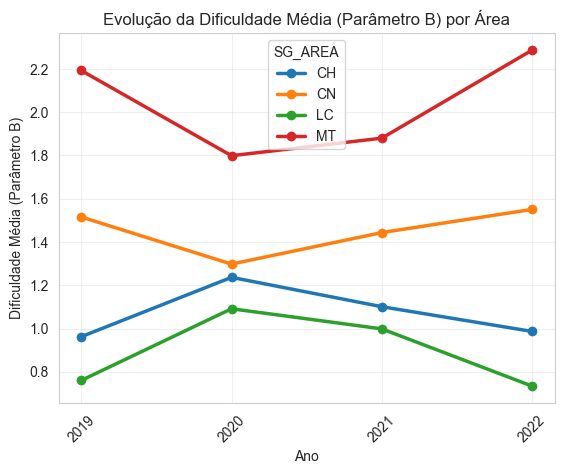

In [41]:
# First ensure years are integers
df['ano'] = df['ano'].astype(int)

# Group by integer years
habilidade_ano_area = df.groupby(['ano', 'SG_AREA'])['NU_PARAM_B'].mean().unstack()

# Plot with proper year formatting
plt.figure(figsize=(24,14))
habilidade_ano_area.plot(marker='o', linewidth=2.5)

# Set x-axis to show only the years we have
plt.xticks(habilidade_ano_area.index, rotation=45)

plt.title('Evolução da Dificuldade Média (Parâmetro B) por Área')
plt.ylabel('Dificuldade Média (Parâmetro B)')
plt.xlabel('Ano')
plt.grid(True, alpha=0.3)
plt.show()